# Step 6 : Pre-processing for ML : Stage 2

1. Split the data into features(X) and the target label(y)


2. Train | Test Split
   - We seperate the training data and test data(hold-out)


3. Feature Selection : 
   - Since the input variables are mostly categorical and the output variable(FINDJOB) is also categorical, Chi-Squared test was adopted to select top 10 features for ML models.


4. Imbalanced Data Check : Check whether our data needs to be resampled
   - Our target label FINDJOB is slightly imbalanced (4:6). This is often not a concern, so we didn't resample the data. 


5. Scale the data with MinMaxScaler
   We chose MinMax Scaler to normalize our data because :
      - Our data are mostly categorical data within the bounded intervals with little outliers(standardization will be better for data with a lot of outliers). Normalization will be useful for this data. 
      - It doesn't distort the shape of the data
  

## Split Data into Features(Xs) and Target(y) 

### Import Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("Findjob_encoded.csv")

In [3]:
df

,FINDJOB,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,...,LOOKJOB_Yes(right away),SCHOOL_Yes,TRAUMA1_Yes,F_SEX_Male,F_HISP_Yes,INJURED,F_RACETHN,F_MARITAL,Branch,p_income
0,1,4,0,2,3,3,0,2,4,3,...,1,0,0,1,0,2,3,1,4,31500
1,0,4,2,2,2,3,0,3,3,2,...,0,0,1,1,0,2,3,1,1,75000
2,1,4,1,2,2,2,1,3,4,2,...,1,0,0,1,0,2,3,1,5,31500
3,1,4,3,2,1,2,2,2,4,2,...,1,0,1,1,0,2,3,1,0,62500
4,1,4,0,2,2,2,0,2,4,2,...,0,1,0,1,0,1,1,1,3,44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,2,1,1,2,2,1,1,2,1,...,0,1,1,1,0,2,3,0,5,63000
237,1,1,0,3,2,3,3,0,2,1,...,1,0,1,0,0,2,3,0,5,25000
238,1,4,0,2,1,3,0,1,3,2,...,1,0,1,1,0,2,3,1,5,31500
239,1,4,3,2,1,3,2,1,2,2,...,1,0,1,1,0,2,3,1,3,62500


In [4]:
len(df.columns)

27

In [5]:
# Split data into X and y
X = df.drop('FINDJOB',axis=1)
y = df['FINDJOB']

## Train | Test Split 

In [6]:
len(df)

241

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# help(train_test_split)
# Split the training data and other(validation + test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
# 168 rows
X_train

,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,F_EDUCCAT2,...,LOOKJOB_Yes(right away),SCHOOL_Yes,TRAUMA1_Yes,F_SEX_Male,F_HISP_Yes,INJURED,F_RACETHN,F_MARITAL,Branch,p_income
169,2,0,2,1,2,3,3,4,1,1,...,1,0,0,1,0,1,3,0,1,63000
141,4,1,2,3,2,0,1,2,3,1,...,1,1,0,1,0,2,3,1,0,44000
237,1,0,3,2,3,3,0,2,1,0,...,1,0,1,0,0,2,3,0,5,25000
16,2,1,1,1,1,3,1,0,1,0,...,1,0,0,1,1,2,0,0,1,63000
176,2,3,1,1,2,2,3,3,3,4,...,0,1,1,1,0,2,3,1,1,31500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4,2,2,2,3,1,2,3,2,2,...,1,1,0,1,0,2,3,1,4,75000
70,2,1,1,2,2,2,2,4,1,4,...,0,1,0,1,0,2,3,1,3,75000
81,0,0,1,0,0,3,3,0,1,0,...,1,0,1,1,0,1,3,0,5,10000
11,4,3,2,3,3,0,3,4,3,4,...,0,0,0,1,0,2,3,1,0,62500


In [10]:
# Check the number of rows 
print(f'Total X: {len(df)} rows')
print(f'X_train: {len(X_train)} rows')
print(f'X_test: {len(X_test)} rows')

Total X: 241 rows
X_train: 168 rows
X_test: 73 rows


## Feature Selection
**Test data should not be used in this step**


Keep in mind that feature selection should be conducted after train test split. The reason is that we should select features based on the information from the training set, not from the whole data set. In this way, the information from the test set would not be seen while conducting feature selection and training the model. In other words, performing feature selection after train test split prevents unnecessary data leakage.

In [11]:
# We have 27 features currently
len(df.columns)

27

### Create a function shows cross validation scores

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
# Create a function to show cross validation score on accuracy,precision,recall, and f1 
def cv_score(model,X_train,y_train,score_type):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=score_type)
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

### Base Model - Logistic with all features 
cross_val_score :https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

F1 score is the harmonic mean of precision and recall. 
https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20is%20a%20useful,like%20fraud%20prevention%20and%20other

Logistic regression :
https://medium.com/@madhuri15/ml-algorithm-logistic-regression-for-a-base-model-35ca5f5029e4

_ Base model F1 score : 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
base_model = LogisticRegression(random_state=101)

In [16]:
# The mean cross validation score is 0.72
# This is just the base model(unscaled data)
cv_score(base_model,X_train,y_train,'f1')

Results :[0.5        0.69565217 0.57142857 0.86666667 0.78571429 0.86666667
 0.69565217 0.78571429 0.66666667 0.72      ]
cv_score: 0.715416149068323


### Chi-Squared Test and Selected Features
For categorical input and categorical output

How to perform feature seleciton with categorical data : 
https://machinelearningmastery.com/feature-selection-with-categorical-data/

SelectKBest :
https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.SelectKBest.html

Introduction of Chi-Squared Test :
https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
# k = Number of top features to select, default=10
Chi = SelectKBest(score_func=chi2,k='all')
Chi_train = Chi.fit(X_train,y_train)

In [19]:
# Visualize Chi-Score and p values from all features
dfscores = pd.DataFrame(Chi_train.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfpvalues=pd.DataFrame(Chi_train.pvalues_)

# Combine three dataset into 1
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)

# Rename the columns
featureScores.columns = ['Features','Chi-Score','p_values']
featureScores = featureScores.sort_values(by='Chi-Score',ascending=False)

# Round up scores
featureScores = np.round(featureScores,2)

# Drop p_income - index 25(numeric should not use Chi-Squared test)
# Should select features with P_values <= 0.05 (top 6 features)
featureScores = featureScores.drop(25,axis=0)

featureScores

,Features,Chi-Score,p_values
2,MILTOCIV,8.56,0.00
3,CIVADJ,6.04,0.01
7,MILHELPJOB,5.91,0.02
15,CIVADJPROBb_Yes,5.74,0.02
14,CIVADJPROBa_Yes,5.48,0.02
0,YEARSERV,3.82,0.05
20,F_HISP_Yes,3.18,0.07
6,MILJOBSKILLS,2.85,0.09
5,CIVADJISSe,2.43,0.12
24,Branch,1.64,0.20


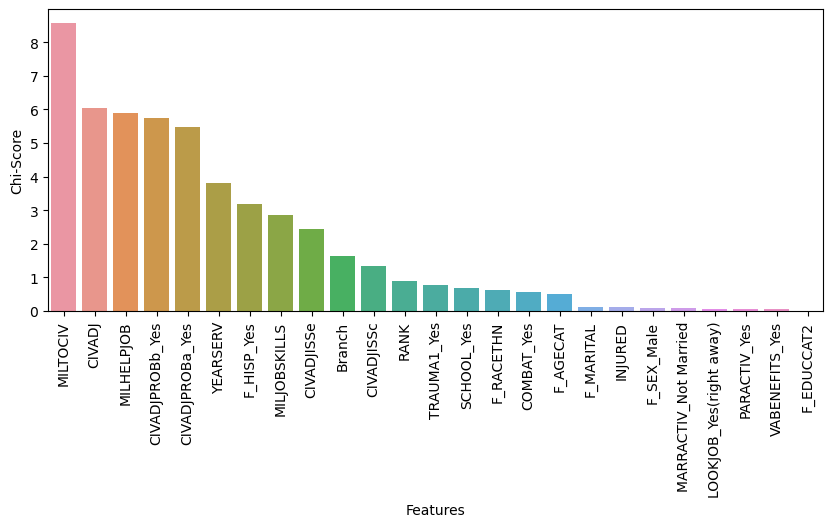

In [20]:
plt.figure(figsize=(10,4),dpi=100)
# Rotate x labels
plt.xticks(rotation=90)

sns.barplot(x= 'Features',y='Chi-Score',data=featureScores);

In [21]:
# Visualize top 6 features
print(featureScores.nlargest(6,'Chi-Score'))

           Features  Chi-Score  p_values
2          MILTOCIV       8.56      0.00
3            CIVADJ       6.04      0.01
7        MILHELPJOB       5.91      0.02
15  CIVADJPROBb_Yes       5.74      0.02
14  CIVADJPROBa_Yes       5.48      0.02
0          YEARSERV       3.82      0.05


In [22]:
# Extract only features name and make it a list of top 6 features
Chi_features = list(featureScores.nlargest(6,'Chi-Score')['Features'])
Chi_features

['MILTOCIV',
 'CIVADJ',
 'MILHELPJOB',
 'CIVADJPROBb_Yes',
 'CIVADJPROBa_Yes',
 'YEARSERV']

In [23]:
Chi_X_train = X_train[Chi_features]
Chi_X_train

,MILTOCIV,CIVADJ,MILHELPJOB,CIVADJPROBb_Yes,CIVADJPROBa_Yes,YEARSERV
169,2,1,4,0,1,2
141,2,3,2,0,0,4
237,3,2,2,0,0,1
16,1,1,0,0,1,2
176,1,1,3,0,0,2
...,...,...,...,...,...,...
63,2,2,3,0,0,4
70,1,2,4,0,0,2
81,1,0,0,1,1,0
11,2,3,4,0,0,4


In [24]:
# The performance increased from 0.72 to 0.74
cv_score(base_model,Chi_X_train,y_train,'f1')

Results :[0.52631579 0.70588235 0.7826087  0.8        0.91666667 0.72
 0.8        0.63157895 0.75       0.8       ]
cv_score: 0.7433052452102122


### Mutual Information Statistic and Selected Features
https://machinelearningmastery.com/information-gain-and-mutual-information/

sklearn.feature_selection.mutual_info_classif :
https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [25]:
from sklearn.feature_selection import mutual_info_classif

In [26]:
mi_scores = mutual_info_classif(X_train,y_train,random_state=101)

In [27]:
mi_scores

array([0.0435347 , 0.        , 0.05490776, 0.05696621, 0.06960943,
       0.        , 0.        , 0.06165003, 0.00727083, 0.05002557,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03027348, 0.        , 0.10056082, 0.        , 0.        ,
       0.0425157 , 0.        , 0.00023953, 0.        , 0.01713637,
       0.03479933])

In [28]:
# In overall, all features have low mi-score
# Visualize mi-Score from all features
dfscores = pd.DataFrame(mi_scores)
dfcolumns = pd.DataFrame(X.columns)

# Combine two dataset into 1
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

# Rename the columns
featureScores.columns = ['Features','mi-Score']
featureScores = featureScores.sort_values(by='mi-Score',ascending=False)

# Round up scores
featureScores = np.round(featureScores,2)

# Drop p_income - index 25(numeric should not use Chi-Squared test)
featureScores = featureScores.drop(25,axis=0)

featureScores

,Features,mi-Score
17,SCHOOL_Yes,0.10
4,CIVADJISSc,0.07
7,MILHELPJOB,0.06
3,CIVADJ,0.06
2,MILTOCIV,0.05
9,F_EDUCCAT2,0.05
0,YEARSERV,0.04
20,F_HISP_Yes,0.04
15,CIVADJPROBb_Yes,0.03
24,Branch,0.02


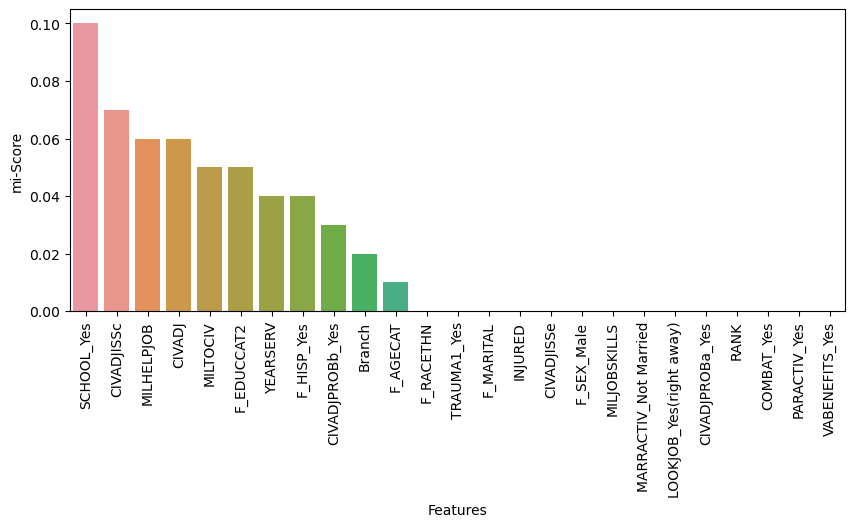

In [29]:
plt.figure(figsize=(10,4),dpi=100)
# Rotate x labels
plt.xticks(rotation=90)

sns.barplot(x= 'Features',y='mi-Score',data=featureScores);

In [30]:
# Extract only features name and make it a list of top 8 features
# Features selected by MI are different from those from Chi-squared test
mi_features = list(featureScores.nlargest(8,'mi-Score')['Features'])
mi_features

['SCHOOL_Yes',
 'CIVADJISSc',
 'MILHELPJOB',
 'CIVADJ',
 'MILTOCIV',
 'F_EDUCCAT2',
 'YEARSERV',
 'F_HISP_Yes']

In [31]:
mi_X_train = X_train[mi_features]
mi_X_train

,SCHOOL_Yes,CIVADJISSc,MILHELPJOB,CIVADJ,MILTOCIV,F_EDUCCAT2,YEARSERV,F_HISP_Yes
169,0,2,4,1,2,1,2,0
141,1,2,2,3,2,1,4,0
237,0,3,2,2,3,0,1,0
16,0,1,0,1,1,0,2,1
176,1,2,3,1,1,4,2,0
...,...,...,...,...,...,...,...,...
63,1,3,3,2,2,2,4,0
70,1,2,4,2,1,4,2,0
81,0,0,0,0,1,0,0,0
11,0,3,4,3,2,4,4,0


In [32]:
# Chi-squared test has higher cv score (should select Chi model)
# The performance increased from 0.72(base model) to 0.73
cv_score(base_model,mi_X_train,y_train,'f1')

Results :[0.52631579 0.66666667 0.66666667 0.76923077 0.86956522 0.8
 0.7826087  0.7        0.7826087  0.77777778]
cv_score: 0.7341440278511216


## Imbalanced Data Check
if we need to do SMOTE : 
- install code : sudo pip install imbalanced-learn

In [33]:
y_train

169    0
141    0
237    1
16     1
176    0
      ..
63     1
70     1
81     0
11     1
95     1
Name: FINDJOB, Length: 168, dtype: int64

In [34]:
# 1 represent findjob within 6 months
# Only check the training data
y_train.value_counts()

1    100
0     68
Name: FINDJOB, dtype: int64

In [35]:
# 1 represent findjob within 6 months
# Percentage : <6 months 60% , >6 month 40%
# The label is slightly imbalance
# This is often not a concern, so we don't resample the data
(y_train.value_counts())/len(y_train)*100

1    59.52381
0    40.47619
Name: FINDJOB, dtype: float64

In [36]:
# These are codes for oversampling (not necessary in this data)
# Remember sampling should be applied after feature selection
# from imblearn.over_sampling import SMOTE
# from collections import Counter

In [37]:
#oversample = SMOTE()
#X,y = oversample.fit_resample(X,y)

In [38]:
#counter = Counter(y)
#for k,v in counter.items():
    #dist = v/ len(y)*100
    #print(f"Class = {k},n={v}({dist}%)")

## Scaling with MinMaxScaler

In [39]:
features = Chi_X_train.columns
features

Index(['MILTOCIV', 'CIVADJ', 'MILHELPJOB', 'CIVADJPROBb_Yes',
       'CIVADJPROBa_Yes', 'YEARSERV'],
      dtype='object')

In [40]:
X_test = X_test[Chi_X_train.columns]

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Scale the data
scaler = MinMaxScaler()
# Only fit training data
scaler.fit(Chi_X_train)
# Scle to all X data
X_train = scaler.transform(Chi_X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[0.66666667, 0.33333333, 1.        , 0.        , 1.        ,
        0.5       ],
       [0.66666667, 1.        , 0.5       , 0.        , 0.        ,
        1.        ],
       [1.        , 0.66666667, 0.5       , 0.        , 0.        ,
        0.25      ],
       ...,
       [0.33333333, 0.        , 0.        , 1.        , 1.        ,
        0.        ],
       [0.66666667, 1.        , 1.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.33333333, 1.        , 0.        , 0.        ,
        1.        ]])

In [44]:
# 6 features, 168 rows
X_train.shape

(168, 6)

In [45]:
X_test.shape

(73, 6)

# Step 7 : Model Selection with K-Fold Cross-Validation

1. Select the best basic model - Logistic Model
2. Tuning the parameters
3. Model evaluation on test data set

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
# Create a function to show cross validation score on accuracy
def Accuracy_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold)
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [48]:
# Create a function to show cross validation score on accuracy
def Precision_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='precision')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [49]:
# Create a function to show cross validation score on accuracy
def Recall_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='recall')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

In [50]:
# Create a function to show cross validation score on f1
def f1_score(model,X_train,y_train):
    kfold = KFold(10)
    results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='f1')
    print(f'Results :{results}')
    print(f'cv_score: {np.mean(results)}')

## Basic Models
### Model 1 : Logistic Regression Model (the best performance)
- Accuracy : 69%
- Precision : 70%
- Recall : 84%
- F1 score: 75%

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression(solver='saga',multi_class ='ovr',max_iter=20000,random_state=101)

In [53]:
# Mean accuracy score : 0.69
Accuracy_score(log_model,X_train,y_train)

Results :[0.41176471 0.58823529 0.70588235 0.82352941 0.82352941 0.64705882
 0.76470588 0.64705882 0.625      0.75      ]
cv_score: 0.6786764705882353


In [54]:
# Mean precision score : 0.70
Precision_score(log_model,X_train,y_train)

Results :[0.35714286 0.54545455 0.64285714 0.85714286 0.78571429 0.81818182
 0.72727273 0.77777778 0.69230769 0.72727273]
cv_score: 0.6931124431124431


In [55]:
# Mean recall score : 0.84
Recall_score(log_model,X_train,y_train)

Results :[0.83333333 0.75       1.         0.92307692 1.         0.69230769
 0.88888889 0.63636364 0.81818182 0.88888889]
cv_score: 0.8431041181041181


In [56]:
# Mean f1 score : 0.75
f1_score(log_model,X_train,y_train)

Results :[0.5        0.63157895 0.7826087  0.88888889 0.88       0.75
 0.8        0.7        0.75       0.8       ]
cv_score: 0.7483076531909483


In [57]:
lg_score = 0.75

### Model 2 : K Nearest Neighbors 
- Accuracy : 63%
- Precision : 68%
- Recall : 73%
- F1 score: 69%

Require scaling of data because KNN uses the Euclidean distance btw two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also is not suitable for large dimensional data 

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn



In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# help(KNeighborsClassifier)

In [60]:
knn_model = KNeighborsClassifier()

In [61]:
# Mean accuracy score : 0.63
Accuracy_score(knn_model,X_train,y_train)

Results :[0.41176471 0.58823529 0.64705882 0.41176471 0.82352941 0.64705882
 0.70588235 0.70588235 0.5        0.8125    ]
cv_score: 0.6253676470588235


In [62]:
# Mean precision score : 0.68
Precision_score(knn_model,X_train,y_train)

Results :[0.33333333 0.53846154 0.63636364 0.71428571 0.78571429 0.81818182
 0.7        0.8        0.66666667 0.8       ]
cv_score: 0.6793006993006994


In [63]:
# Mean recall score : 0.73
Recall_score(knn_model,X_train,y_train)

Results :[0.66666667 0.875      0.77777778 0.38461538 1.         0.69230769
 0.77777778 0.72727273 0.54545455 0.88888889]
cv_score: 0.7335761460761461


In [64]:
# Mean f1 score : 0.69
f1_score(knn_model,X_train,y_train)

Results :[0.44444444 0.66666667 0.7        0.5        0.88       0.75
 0.73684211 0.76190476 0.6        0.84210526]
cv_score: 0.6881963241436926


In [65]:
knn_score = 0.69

### Model 3 : Support Vector Machines 
- Accuracy : 68%
- Precision : 71%
- Recall : 80%
- F1 score: 74%


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [66]:
# Support Vector Classifier
from sklearn.svm import SVC

In [67]:
svm_model = SVC(random_state=101)

In [68]:
# Mean accuracy score : 0.68
Accuracy_score(svm_model,X_train,y_train)

Results :[0.47058824 0.64705882 0.76470588 0.64705882 0.88235294 0.58823529
 0.70588235 0.70588235 0.625      0.75      ]
cv_score: 0.6786764705882353


In [69]:
# Mean precision score : 0.71
Precision_score(svm_model,X_train,y_train)

Results :[0.38461538 0.6        0.69230769 0.81818182 0.84615385 0.75
 0.7        0.8        0.72727273 0.77777778]
cv_score: 0.7096309246309247


In [70]:
# Mean recall score : 0.8
Recall_score(svm_model,X_train,y_train)

Results :[0.83333333 0.75       1.         0.69230769 1.         0.69230769
 0.77777778 0.72727273 0.72727273 0.77777778]
cv_score: 0.7978049728049729


In [71]:
# Mean f1 : 0.74
f1_score(svm_model,X_train,y_train)

Results :[0.52631579 0.66666667 0.81818182 0.75       0.91666667 0.72
 0.73684211 0.76190476 0.72727273 0.77777778]
cv_score: 0.740162831320726


In [72]:
svm_score = 0.74

### Model 4 : Decision Tree 
- Accuracy : 68
- Precision : 69
- Recall : 84
- F1 score: 75

In [73]:
# Mean accuracy score : 0.68
Accuracy_score(base_model,X_train,y_train)

Results :[0.41176471 0.58823529 0.70588235 0.82352941 0.82352941 0.64705882
 0.76470588 0.64705882 0.625      0.75      ]
cv_score: 0.6786764705882353


In [74]:
# Mean precision score : 0.69
Precision_score(base_model,X_train,y_train)

Results :[0.35714286 0.54545455 0.64285714 0.85714286 0.78571429 0.81818182
 0.72727273 0.77777778 0.69230769 0.72727273]
cv_score: 0.6931124431124431


In [75]:
# Mean recall score : 0.84
Recall_score(base_model,X_train,y_train)

Results :[0.83333333 0.75       1.         0.92307692 1.         0.69230769
 0.88888889 0.63636364 0.81818182 0.88888889]
cv_score: 0.8431041181041181


In [76]:
# Mean f1 score : 0.75
f1_score(base_model,X_train,y_train)

Results :[0.5        0.63157895 0.7826087  0.88888889 0.88       0.75
 0.8        0.7        0.75       0.8       ]
cv_score: 0.7483076531909483


In [77]:
tree_score = 0.75

### Model 5 : Random Forest 
- Accuracy : 65%
- Precision : 69%
- Recall : 72%
- F1 score: 69%

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# help(RandomForestClassifier)

In [80]:
rf_model = RandomForestClassifier(random_state=101)

In [81]:
# Mean accuracy score : 0.65
Accuracy_score(rf_model,X_train,y_train)

Results :[0.52941176 0.47058824 0.52941176 0.70588235 0.88235294 0.76470588
 0.70588235 0.64705882 0.5        0.75      ]
cv_score: 0.6485294117647059


In [82]:
# Mean precision score : 0.69
Precision_score(rf_model,X_train,y_train)

Results :[0.41666667 0.4        0.53333333 0.9        0.90909091 0.90909091
 0.7        0.77777778 0.66666667 0.72727273]
cv_score: 0.693989898989899


In [83]:
# Mean recall score : 0.72
Recall_score(rf_model,X_train,y_train)

Results :[0.83333333 0.25       0.88888889 0.69230769 0.90909091 0.76923077
 0.77777778 0.63636364 0.54545455 0.88888889]
cv_score: 0.7191336441336442


In [84]:
# Mean f1 score : 0.69
f1_score(rf_model,X_train,y_train)

Results :[0.55555556 0.30769231 0.66666667 0.7826087  0.90909091 0.83333333
 0.73684211 0.7        0.6        0.8       ]
cv_score: 0.6891789573254103


In [85]:
rf_score = 0.69

### Model 6 : AdaBoost 
- Accuracy : 60%
- Precision : 67%
- Recall : 70%
- F1 score: 67%

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ab_model = AdaBoostClassifier(random_state=101)

In [88]:
# Mean accuracy score : 0.6
Accuracy_score(ab_model,X_train,y_train)

Results :[0.29411765 0.41176471 0.52941176 0.70588235 0.82352941 0.58823529
 0.58823529 0.58823529 0.6875     0.8125    ]
cv_score: 0.6029411764705882


In [89]:
# Mean precision score : 0.67
Precision_score(ab_model,X_train,y_train)

Results :[0.25       0.4        0.53333333 0.9        0.83333333 0.75
 0.58333333 0.75       0.8        0.875     ]
cv_score: 0.6675


In [90]:
# Mean recall score : 0.7
Recall_score(ab_model,X_train,y_train)

Results :[0.5        0.5        0.88888889 0.69230769 0.90909091 0.69230769
 0.77777778 0.54545455 0.72727273 0.77777778]
cv_score: 0.701087801087801


In [91]:
# Mean f1 score : 0.67
f1_score(ab_model,X_train,y_train)

Results :[0.33333333 0.44444444 0.66666667 0.7826087  0.86956522 0.72
 0.66666667 0.63157895 0.76190476 0.82352941]
cv_score: 0.6700298145192478


In [92]:
ada_score = 0.67

### Model 7 : Gradient Boosting
- Accuracy : 63%
- Precision : 68%
- Recall : 69%
- F1 score: 67%

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
#help(GradientBoostingClassifier)

In [95]:
gb_model =GradientBoostingClassifier(random_state=101)

In [96]:
# Mean accuracy score : 0.63
Accuracy_score(gb_model,X_train,y_train)

Results :[0.47058824 0.41176471 0.70588235 0.70588235 0.82352941 0.70588235
 0.70588235 0.64705882 0.5        0.625     ]
cv_score: 0.6301470588235294


In [97]:
# Mean precision score : 0.68
Precision_score(gb_model,X_train,y_train)

Results :[0.36363636 0.375      0.7        0.9        0.78571429 0.83333333
 0.7        0.77777778 0.71428571 0.63636364]
cv_score: 0.6786111111111113


In [98]:
# Mean recall score : 0.69
Recall_score(gb_model,X_train,y_train)

Results :[0.66666667 0.375      0.77777778 0.69230769 1.         0.76923077
 0.77777778 0.63636364 0.45454545 0.77777778]
cv_score: 0.6927447552447552


In [99]:
# Mean f1 score : 0.67
f1_score(gb_model,X_train,y_train)

Results :[0.47058824 0.375      0.73684211 0.7826087  0.88       0.8
 0.73684211 0.7        0.55555556 0.7       ]
cv_score: 0.6737436697028163


In [100]:
gb_score=0.67

In [101]:
all_scores = (lg_score,knn_score,svm_score,tree_score,rf_score, ada_score, gb_score)
all_scores =list(all_scores)

model=['Logistic regression','K nearest neighbors','Support vector machine','Decision tree'
                        ,'Random forest', 'AdaBoost', 'Gradient Boosting']

compare_scores = pd.DataFrame({'Model':model,'F1 score':all_scores})
compare_scores.sort_values(by='F1 score',ascending=False)


,Model,F1 score
0,Logistic regression,0.75
3,Decision tree,0.75
2,Support vector machine,0.74
1,K nearest neighbors,0.69
4,Random forest,0.69
5,AdaBoost,0.67
6,Gradient Boosting,0.67


## Tuning Parameters for the Best Basic Model : Logistic Model

Before vs After :
- Accuracy :  69% | 69%
- Precision : 70% | 70%
- Recall :    84% | 84%
- F1 score:   75% | 75%

The scores are the same since the parameters used in the previous legistic model are the best performing parameters. 

Logistic regression :

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html


In [102]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [103]:
final_model = log_model = LogisticRegression(solver='saga',multi_class ='ovr',max_iter=20000,random_state=101)

In [104]:
# Check the parameters
final_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [105]:
# Parameters Settings

# Penalty type
penalty = ['l1','l2']


# Use logarithmically spaced C values
# np.logspace(start,stop,num)
C = np.logspace(0,10,20)


param_grid = {'penalty':penalty,
              'C':C}

In [106]:
# Create a grid model and pass in the parameters above to do a grid search
# Remember to state the scoring type
grid_model = GridSearchCV(final_model,param_grid = param_grid,scoring='f1')

In [107]:
# Fit the model
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=20000, multi_class='ovr',
                                          random_state=101, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [108]:
grid_model.best_estimator_

LogisticRegression(max_iter=20000, multi_class='ovr', random_state=101,
                   solver='saga')

In [109]:
# Show the best parameters for f1 scores
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [110]:
# Create a model and set the parameters as above
best_model = LogisticRegression(solver='saga',multi_class ='ovr',max_iter=20000
                                ,C= 1,penalty = 'l2',random_state=101)

In [111]:
# Mean accuracy score : 0.68
Accuracy_score(best_model,X_train,y_train)

Results :[0.41176471 0.58823529 0.70588235 0.82352941 0.82352941 0.64705882
 0.76470588 0.64705882 0.625      0.75      ]
cv_score: 0.6786764705882353


In [112]:
# Mean precision score : 0.69
Precision_score(best_model,X_train,y_train)

Results :[0.35714286 0.54545455 0.64285714 0.85714286 0.78571429 0.81818182
 0.72727273 0.77777778 0.69230769 0.72727273]
cv_score: 0.6931124431124431


In [113]:
# Mean recall score : 0.84
Recall_score(best_model,X_train,y_train)

Results :[0.83333333 0.75       1.         0.92307692 1.         0.69230769
 0.88888889 0.63636364 0.81818182 0.88888889]
cv_score: 0.8431041181041181


In [114]:
# Mean f1 score : 0.75
f1_score(best_model,X_train,y_train)

Results :[0.5        0.63157895 0.7826087  0.88888889 0.88       0.75
 0.8        0.7        0.75       0.8       ]
cv_score: 0.7483076531909483


## Model Evaluation on Test Data (Hold-out set)

### Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [116]:
# Create a function that print out the final test result
def report_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
    disp.plot()
    print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        29
           1       0.65      0.70      0.67        44

    accuracy                           0.59        73
   macro avg       0.56      0.56      0.56        73
weighted avg       0.58      0.59      0.58        73



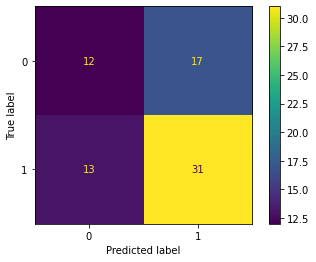

In [119]:
# This is the final test result
report_model(best_model)

### Feature Importance

In [120]:
# Check the feature names
features

Index(['MILTOCIV', 'CIVADJ', 'MILHELPJOB', 'CIVADJPROBb_Yes',
       'CIVADJPROBa_Yes', 'YEARSERV'],
      dtype='object')

In [121]:
# Check feature coefficients from the best model
coef = best_model.coef_
coef

array([[ 0.81771099,  0.77467317,  1.24944306, -0.83604668, -0.24687666,
         0.25948577]])

In [122]:
# Check data type of features and coef
type(features)

pandas.core.indexes.base.Index

In [123]:
type(coef)

numpy.ndarray

In [124]:
# Check the shape of features and coef
# the output is a tuple representing the dimensions of the array
# (A,B) : A rows and B columns
# (6,) means 6 rows 1 column
features.shape

(6,)

In [125]:
# 1 ros 6 columns
coef.shape

(1, 6)

In [126]:
# To put features and coefficients together, they need to be the same shape
# Reshape coef to be all rows
coef = coef.reshape(6,)
coef

array([ 0.81771099,  0.77467317,  1.24944306, -0.83604668, -0.24687666,
        0.25948577])

In [127]:
coef.shape

(6,)

In [128]:
# Combine feature names and its coefficient to a dataframe
fc = pd.DataFrame(np.column_stack([features,coef]),columns=['Features','coefficients'])
fc.sort_values(by='coefficients',ascending=False)

,Features,coefficients
2,MILHELPJOB,1.249443
0,MILTOCIV,0.817711
1,CIVADJ,0.774673
5,YEARSERV,0.259486
4,CIVADJPROBa_Yes,-0.246877
3,CIVADJPROBb_Yes,-0.836047


In [129]:
# Seperate negative features and positive features
# We can see that CIVADJPROBb(receive food benefits) affact FINDJOB negatively the most
negative_features = fc[fc['coefficients']<0]
negative_features= negative_features.sort_values('coefficients',ascending=True)
negative_features

,Features,coefficients
3,CIVADJPROBb_Yes,-0.836047
4,CIVADJPROBa_Yes,-0.246877


In [130]:
# How veterans adjust to civilian life seems to be an important factor
positive_features = fc[fc['coefficients']>0]
positive_features = positive_features.sort_values('coefficients',ascending=False)
positive_features

,Features,coefficients
2,MILHELPJOB,1.249443
0,MILTOCIV,0.817711
1,CIVADJ,0.774673
5,YEARSERV,0.259486


### Precision-Recall Curve and ROC Curve

In [131]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

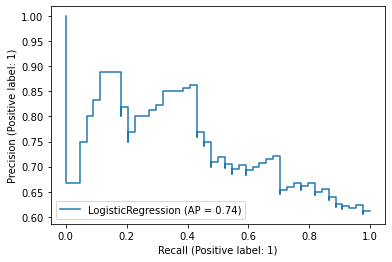

In [132]:
plot_precision_recall_curve(best_model,X_test,y_test);

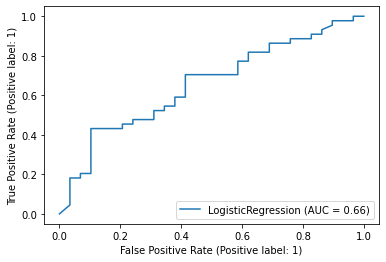

In [133]:
# AUC: 0.66
plot_roc_curve(best_model,X_test,y_test);

# Conclusion

## Potential causes of non ideal performance
- Training sample is not large enough : increase sample size
- empirical test to check whether your features separates your classes: extract the first two or three principal components and display them on a 2D or 3D scatter plot (use a different marker for each class). That will also help you see whether there are outliers that may affect the results.
- One of the explanation is that your data does not support accuracy higher than 70%. Maybe your features doesn't fit enough to get better classification
- High dimensionality : Perform feature selection to reduce features(dimensionality)